# Neural Nets
Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

# How do neural networks work?
Think of each individual node as its own linear regression model, composed of input data, weights, a bias (or threshold), and an output. The formula would look something like this:

$∑wixi + bias = w1x1 + w2x2 + w3x3 + bias$

$$output = f(x) = 1 \ if\ ∑w1x1 + b>= 0;    
           0\  if\ ∑w1x1 + b < 0$$   
Once an input layer is determined, weights are assigned. These weights help determine the importance of any given variable, with larger ones contributing more significantly to the output compared to other inputs. All inputs are then multiplied by their respective weights and then summed. Afterward, the output is passed through an activation function, which determines the output. If that output exceeds a given threshold, it “fires” (or activates) the node, passing data to the next layer in the network. This results in the output of one node becoming in the input of the next node. This process of passing data from one layer to the next layer defines this neural network as a feedforward network.

Let’s break down what one single node might look like using binary values. We can apply this concept to a more tangible example, like whether you should go surfing (Yes: 1, No: 0). The decision to go or not to go is our predicted outcome, or y-hat. Let’s assume that there are three factors influencing your decision-making:

Are the waves good? (Yes: 1, No: 0)
Is the line-up empty? (Yes: 1, No: 0)
Has there been a recent shark attack? (Yes: 0, No: 1)
Then, let’s assume the following, giving us the following inputs:

X1 = 1, since the waves are pumping
X2 = 0, since the crowds are out
X3 = 1, since there hasn’t been a recent shark attack
Now, we need to assign some weights to determine importance. Larger weights signify that particular variables are of greater importance to the decision or outcome.

W1 = 5, since large swells don’t come around often
W2 = 2, since you’re used to the crowds
W3 = 4, since you have a fear of sharks
Finally, we’ll also assume a threshold value of 3, which would translate to a bias value of –3. With all the various inputs, we can start to plug in values into the formula to get the desired output.

$Y-hat = (1*5) + (0*2) + (1*4) – 3 = 6$

If we use the activation function from the beginning of this section, we can determine that the output of this node would be 1, since 6 is greater than 0. In this instance, you would go surfing; but if we adjust the weights or the threshold, we can achieve different outcomes from the model. When we observe one decision, like in the above example, we can see how a neural network could make increasingly complex decisions depending on the output of previous decisions or layers.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist 
import numpy as np
import matplotlib.pyplot as plt

# Use the keras module to import the necessary data 
(train_X, train_y), (test_X, test_y) =fashion_mnist.load_data()


The data structures train_x and test_x are stored as 3 dimensional tensors.

In [5]:
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

print(f"train_X[0] = {train_X[0]}")

np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 

train_X[0] = [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0  

Each image is comprised of a 28*28 grey scaled grid of pixel values. These values are floating point numbers in the interval （0，1）, where darker pixels will have values closer to 1 and lighter pixels will have values closer to . The following image represents one such example.

train_y[0] = 9 



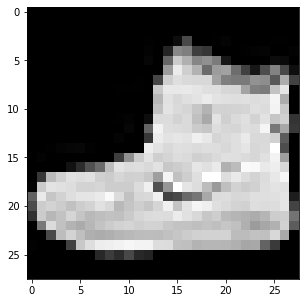

In [6]:
print(f"{train_y[0] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[0], cmap="gray")
plt.show()

## Image Flattening
Simple dense neural networks pass feature vectors into the 0-th (the first) layer of the computational graph represented by the neural network structure as column vectors. This 0-th layer is essentially the same as with single neuron models. In order to feed our images into such a network we must flatten the matrix into a column vector.

## Drawing

We can do this for each image matrix that we are considering by calling the flatten() method together with the reshape(784, 1) method to insure it is a column vector. Note, that each image matrix is 28 by 28, and so, 784 is the number of rows in the flattened matrix column vector. The numerical values in the flattened training and testing data matrices vary between 0 and 255. These large differences in possible values can lead to problems when training the weights and the biases of the neural network. A quick and dirty fix will be to scale all data to belong in the interval (0,1) i.e., divide the entries by the largest possible value; in this case 255.

In [7]:
train_X = train_X/255
test_X = test_X/255

# Flatten the training images into coloumn vectors. 
flat_train_X = []
# One hot encode the training labels
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)
   

# Do the same for the testing data 
flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)

---

## Building the Network Architecture 
For our purposes, we will build a multilayered **fully connected**, or **dense**, neural network with $L$ layers, $784$ input notes, $L-2$ hidden layers of arbitrary size, and $10$ output nodes. 


For our activation function, we will use the sigmoid function:

* Sigmoid Function
$$
\sigma(z) = \frac{1}{1+e^{-z}}.
$$

For our cost function, we will use the Mean Sqaure Error cost:
$$
C(W, b) = \frac{1}{2}\sum_{k=1}^{10}(\hat{y}^{(i)}_k - y^{(i)}_k)^2.
$$

Our goal will be to write a custom Python class implementing our desired structure. However, before doing so, we first sequentually write functions to better understand the process of programming the following:

* Initializing the weights and biases of each layer
* The feedforward phase
* Calculation of the cost function
* Calculation of the gradient
* Iterating stochastic gradient descent

First we will define our sigmoid activation function, its derivative, and the mean squared error for a single instance of training data. Do this by running the following code. 

---

In [8]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

In [9]:
def initialize_weights(layers = [784, 60, 60, 10]):
    # The following Python lists will contain numpy matrices
    # connected the layers in the neural network 
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        # The scalling factor is something I found in a research paper :)
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B

---

## Feedforward Phase

For $\ell = 1, \dots, L$, each layer $\ell$ in our network will have two phases, the preactivation phase $$\mathbf{z}^{\ell} = W^{\ell}\mathbf{a}^{\ell-1} + \mathbf{b}^{\ell},$$ and postactivation phase $$\mathbf{a}^{\ell} = \sigma(\mathbf{z}^{\ell}).$$ The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through an activation function elementwise. Note $\mathbf{a}^0 = \mathbf{x}^{(i)}$, where $\mathbf{x}^{(i)}$ is the current input data into our network. 

We can test our activation functions and matrix dimensions by running the following code which manually implements the feedforward process on a neural network with the given dimensions.

---

In [10]:
W, B = initialize_weights()

xi = flat_train_X[0]
yi = onehot_train_y[0]
a0 = xi

print(f"np.shape(a0) = {np.shape(a0)} \n")

z1 = W[1] @ a0 + B[1]
a1 = sigmoid(z1)

print(f"np.shape(W[1]) = {np.shape(W[1])}")
print(f"np.shape(z1) = {np.shape(z1)}")
print(f"np.shape(a1) = {np.shape(a1)} \n")

z2 = W[2] @ a1 + B[2]
a2 = sigmoid(z2)

print(f"np.shape(W[2]) = {np.shape(W[2])}")
print(f"np.shape(z2) = {np.shape(z2)}")
print(f"np.shape(a2) = {np.shape(a2)} \n")

z3 = W[3] @ a2 + B[3]
a3 = sigmoid(z3)
y_hat = a3
print(f"np.shape(W[3]) = {np.shape(W[3])}")
print(f"np.shape(z3) = {np.shape(z3)}")
print(f"np.shape(a3) = {np.shape(a3)} \n")


print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

np.shape(a0) = (784, 1) 

np.shape(W[1]) = (60, 784)
np.shape(z1) = (60, 1)
np.shape(a1) = (60, 1) 

np.shape(W[2]) = (60, 60)
np.shape(z2) = (60, 1)
np.shape(a2) = (60, 1) 

np.shape(W[3]) = (10, 60)
np.shape(z3) = (10, 1)
np.shape(a3) = (10, 1) 

Prediction: np.argmax(y_hat) = 6
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.5547052578060903


In [11]:
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]]
    A = [xi]
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    _, A = forward_pass(W, B, xi)
    return np.argmax(A[-1])

y_hat = forward_pass(W, B, flat_train_X[0], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

Prediction: np.argmax(y_hat) = 6
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.5547052578060903


In [12]:
def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")
    

def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost += mse(a, yi)
        m+=1
    return cost/m

In [13]:
print(f"MSE(W, B, flat_train_X, onehot_train_y) = {MSE(W, B, flat_train_X, onehot_train_y)} \n")

random_experiment(W, B, flat_train_X, onehot_train_y)

MSE(W, B, flat_train_X, onehot_train_y) = 1.5011293567327328 

Actual label: 1
Predicted label: 6


---

## Backpropogation Phase with Stochastic Gradient Descent 
We are now ready to define a custom Python ```DenseNetwork``` class which initializes the weights and bias for the network, and implements stochastic gradient descent shown below:

1. For each $i = 1, \dots, N$.
2. Feedforward $\mathbf{x}^{(i)}$ into the network. 
3. Compute $\delta^{L} = \nabla_aC\otimes \sigma'(\mathbf{z}^{L})$.
4. For $\ell = L-1, \dots, 1$, compute $\delta^{\ell} = \big ( (\mathbf{w}^{\ell + 1})^{T} \delta^{\ell + 1} \Big )\otimes \sigma'(\mathbf{z}^{\ell})$.
5. For $\ell = L, L-1, \dots, 1$, 

$$
w^{\ell} \leftarrow w^{\ell} - \alpha \delta^{\ell}(\mathbf{a}^{\ell-1})^{T}
$$

$$
b^{\ell} \leftarrow b^{\ell} - \alpha \delta^{\ell}
$$


---

In [14]:
class DenseNetwork(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.046, epochs = 4):
        # Print the initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # Find your sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # For each epoch perform stochastic gradient descent. 
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error 
                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive. 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient 
                # descent. 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Show the user the cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.4923047267415745 

predicted digit is: 4
actual digit is: 3


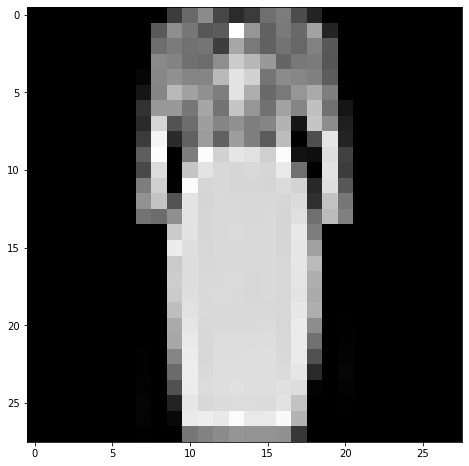

In [15]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = DenseNetwork(layers = [784, 120, 145, 120, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [16]:
net.train(flat_train_X, onehot_train_y)

Starting Cost = 1.4923047267415745
1-Epoch Cost = 0.12979336917028864
2-Epoch Cost = 0.11183622589082663
3-Epoch Cost = 0.10280277012268645
4-Epoch Cost = 0.09700752823303448


predicted digit is: 8
actual digit is: 8


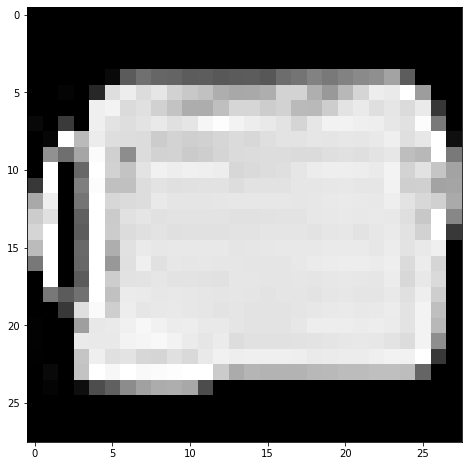

In [17]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 7
actual digit is: 7


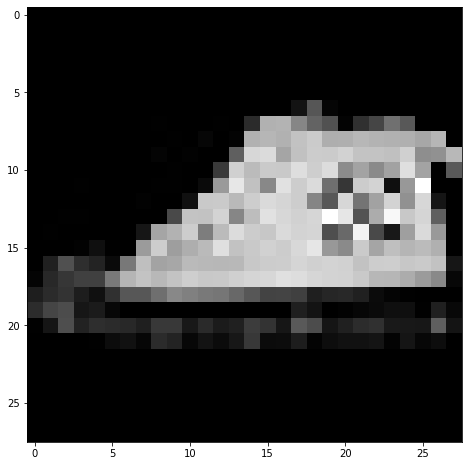

In [18]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 1
actual digit is: 1


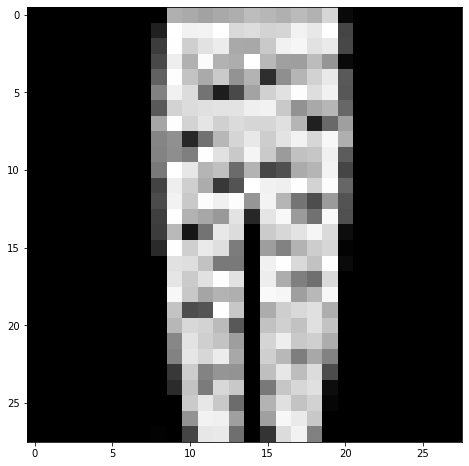

In [19]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 8
actual digit is: 8


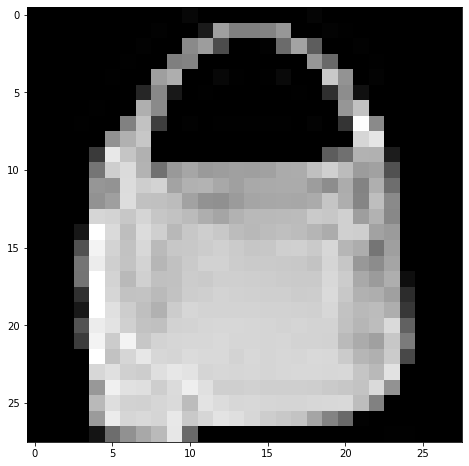

In [20]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 8
actual digit is: 8


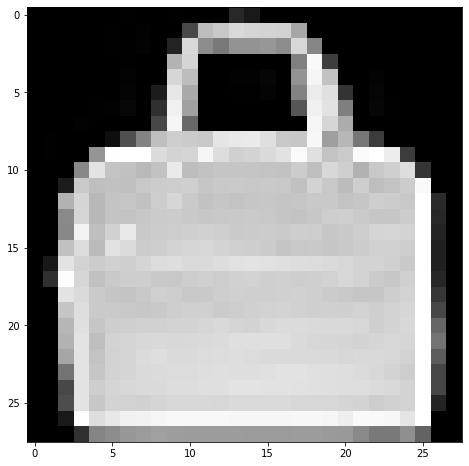

In [21]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 3
actual digit is: 3


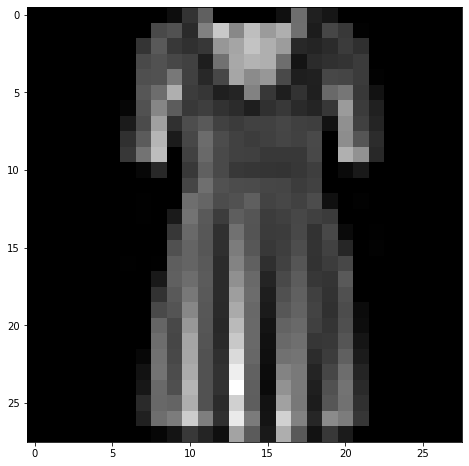

In [22]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 6
actual digit is: 6


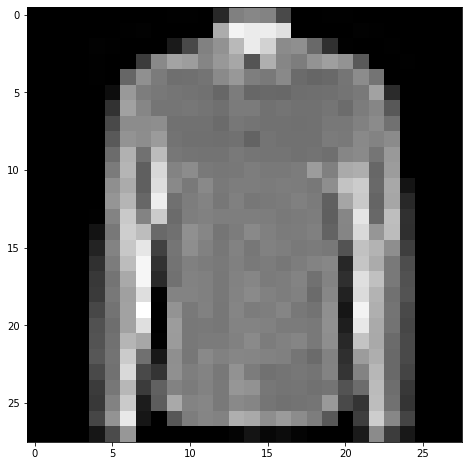

In [23]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

---

## Classification Error
Let us now calculate the classification percentage on the testing data for our trained dense neural network. Recall that this is simply the number of correct labels divided by the total number of data points:

This can be done by running the following code. 


---

In [24]:
sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)

0.8516

In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.6.0


In [5]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) =mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)])

In [9]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.09947539,  1.6649184 ,  0.08874101,  0.41958863, -0.15758717,
         1.034104  ,  0.56981945, -0.24195653,  0.5706073 , -0.47857925]],
      dtype=float32)

In [10]:
tf.nn.softmax(predictions).numpy()

array([[0.05198905, 0.30351377, 0.06275571, 0.0873652 , 0.04905398,
        0.16151734, 0.10152733, 0.04508511, 0.10160735, 0.03558518]],
      dtype=float32)

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
loss_fn(y_train[:1], predictions).numpy()

3.335826

In [13]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5274 - accuracy: 0.8126
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3972 - accuracy: 0.8563
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3655 - accuracy: 0.8669
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3457 - accuracy: 0.8735
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3286 - accuracy: 0.8779


In [15]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.3776 - accuracy: 0.8660


[0.37758997082710266, 0.8659999966621399]